In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

from models import Brain2Vec, Brain2Seq
from data import TensorDataset

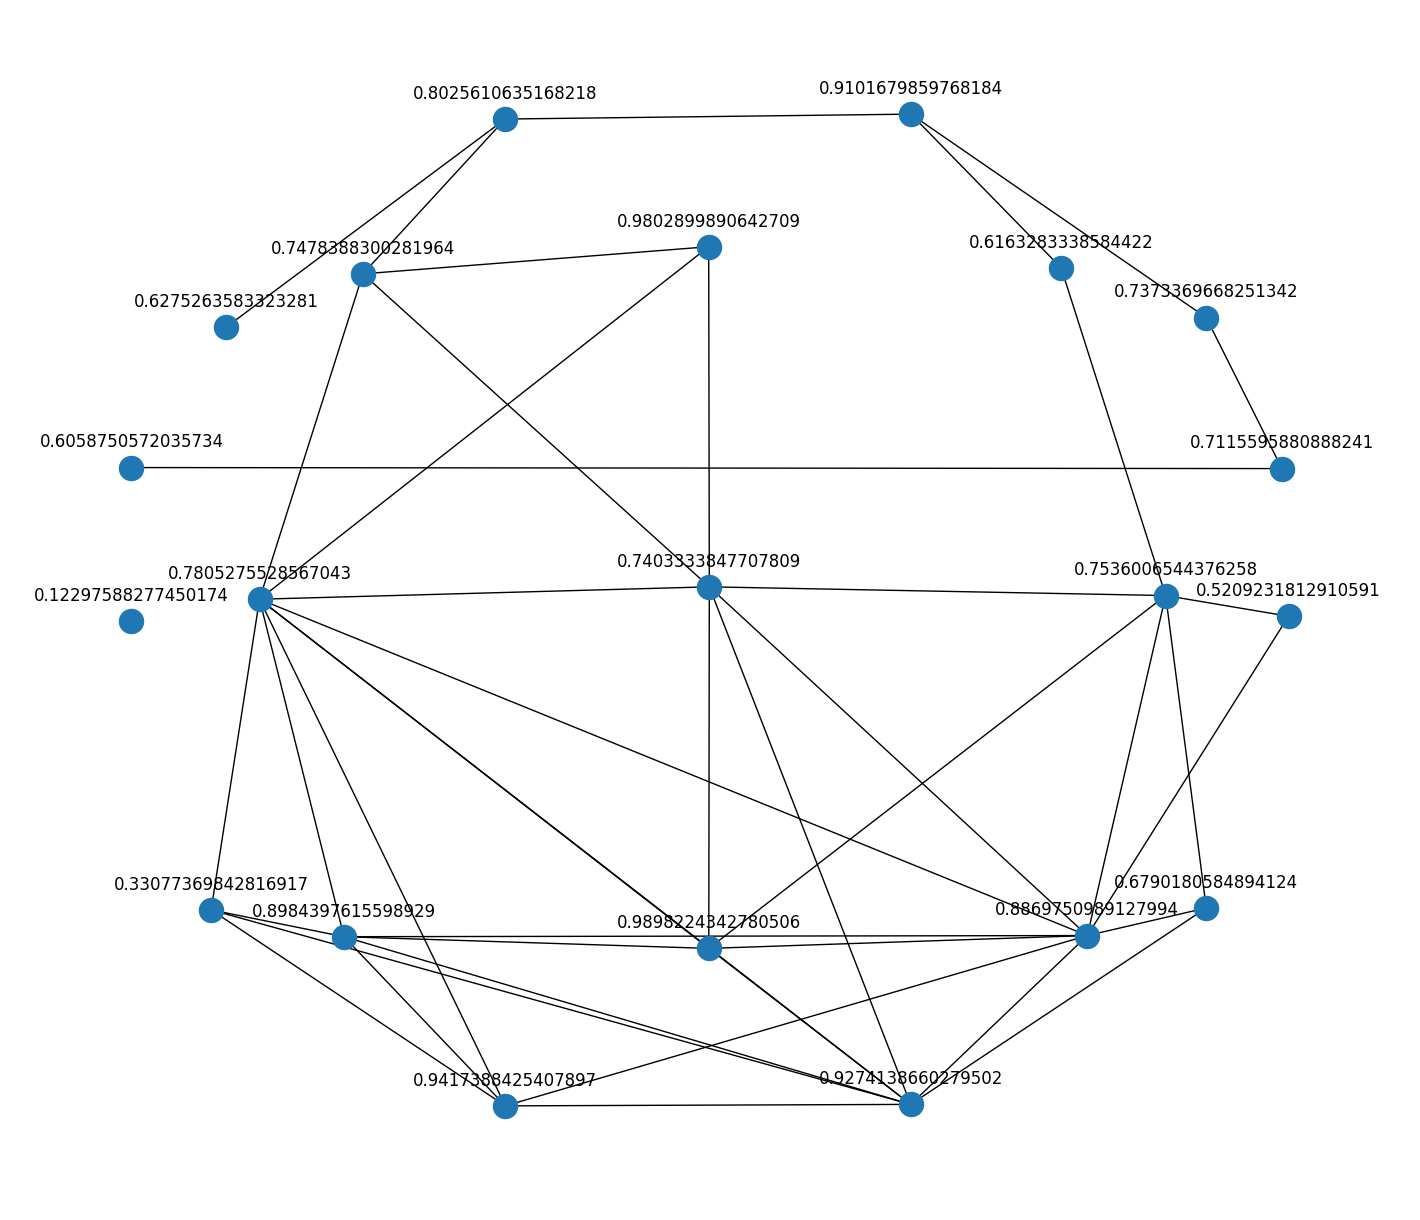

In [7]:
ds = TensorDataset(name="chb_mit_window_1", split="train", method="kfold", folds=5, k=-1, transform=Brain2Vec(
        n_times=256,
        n_outputs=1,
        loss_fn="ce",
        signal_transform="wavelet",
        node_transform="unipolar",
        edge_select="dynamic",
        threshold=0.5,
).transform)

g = to_networkx(ds[5], node_attrs=["x"], graph_attrs=["node_positions"], to_undirected=True)
plt.figure(1, figsize=(14, 12))

x = nx.get_node_attributes(g, "x")
pos = {key: g.graph["node_positions"][key][:2] for key, _ in x.items()}

nx.draw(g, pos=pos)
nx.draw_networkx_labels(
    g,
    pos={key: [val[0]-0.00, val[1]+0.005] for key, val in pos.items()},
    labels={key: np.linalg.norm(x[key]) for key, _ in pos.items()}
)

plt.show()

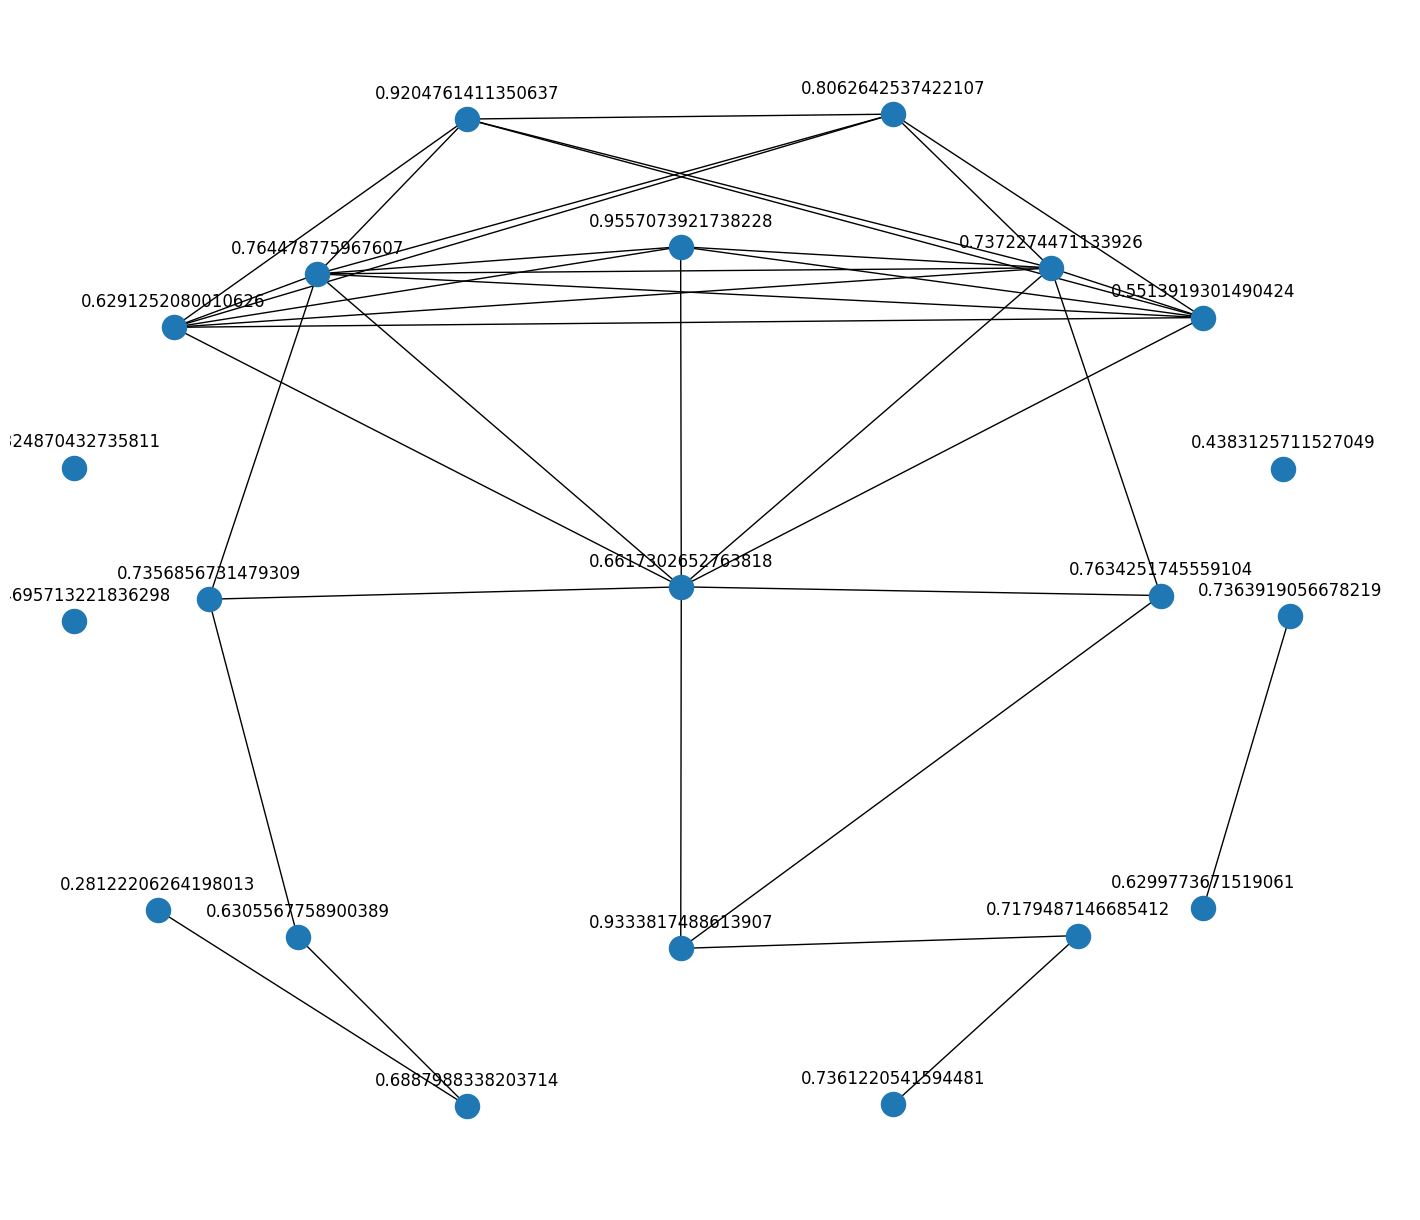

In [8]:
ds = TensorDataset(name="chb_mit_window_5", split="train", method="kfold", folds=5, k=-1, transform=Brain2Vec(
        n_times=256,
        n_outputs=1,
        loss_fn="ce",
        signal_transform="wavelet",
        node_transform="unipolar",
        edge_select="dynamic",
        threshold=0.5,
).transform)

g = to_networkx(ds[5], node_attrs=["x"], graph_attrs=["node_positions"], to_undirected=True)
plt.figure(1, figsize=(14, 12))

x = nx.get_node_attributes(g, "x")
pos = {key: g.graph["node_positions"][key][:2] for key, _ in x.items()}

nx.draw(g, pos=pos)
nx.draw_networkx_labels(
    g,
    pos={key: [val[0]-0.00, val[1]+0.005] for key, val in pos.items()},
    labels={key: np.linalg.norm(x[key]) for key, _ in pos.items()}
)

plt.show()

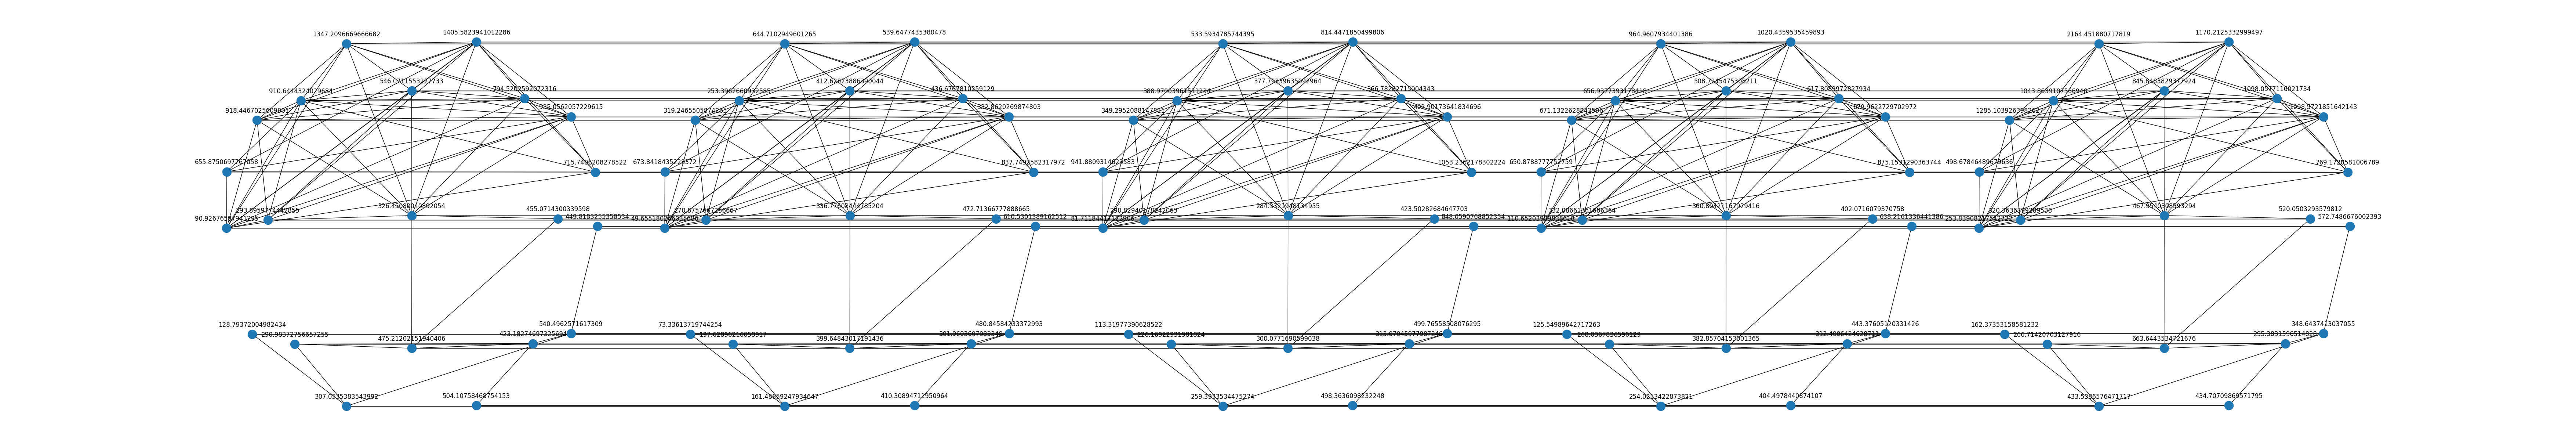

In [46]:
ds = TensorDataset(name="chb_mit_window_5", split="train", method="kfold", folds=5, k=-1, transform=Brain2Seq(
        n_times=256,
        n_outputs=1,
        loss_fn="ce",
        signal_transform="wavelet",
        node_transform="unipolar",
        edge_select="dynamic",
        threshold=0.5,
).transform)

g = to_networkx(ds[5], node_attrs=["x"], graph_attrs=["graph_size", "graph_length", "node_positions"], to_undirected=True)
plt.figure(1, figsize=(14*5, 12))

x = nx.get_node_attributes(g, "x")

size = g.graph["graph_size"]
length = g.graph["graph_length"]
pos = {key: g.graph["node_positions"][key % size][:2] + np.array([int(key / size) * 0.2, int(key / size) * 0.00]) for key, _ in x.items()}

nx.draw(g, pos=pos)
nx.draw_networkx_labels(
    g,
    pos={key: [val[0]-0.00, val[1]+0.005] for key, val in pos.items()},
    labels={key: np.linalg.norm(x[key]) for key, _ in pos.items()}
)

plt.show()

In [47]:
ds = TensorDataset(name="chb_mit_window_30", split="train", method="kfold", folds=5, k=-1, transform=Brain2Seq(
        n_times=256,
        n_outputs=1,
        loss_fn="ce",
        signal_transform="wavelet",
        node_transform="unipolar",
        edge_select="dynamic",
        threshold=0.5,
).transform)

g = to_networkx(ds[5], node_attrs=["x"], graph_attrs=["graph_size", "graph_length", "node_positions"], to_undirected=True)
plt.figure(1, figsize=(14*30, 12))

x = nx.get_node_attributes(g, "x")

size = g.graph["graph_size"]
length = g.graph["graph_length"]
pos = {key: g.graph["node_positions"][key % size][:2] + np.array([int(key / size) * 0.2, int(key / size) * 0.00]) for key, _ in x.items()}

nx.draw(g, pos=pos)
nx.draw_networkx_labels(
    g,
    pos={key: [val[0]-0.00, val[1]+0.005] for key, val in pos.items()},
    labels={key: np.linalg.norm(x[key]) for key, _ in pos.items()}
)

plt.show()